

# Project: Investigate a European Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project's objective is to provide football performace analysis for several European countries and provide recommendations for the future success. 

### Dataset Description 

> The soccer database contains data for soccer matches,players and teams from several European countries from 2008 to 2016
The data contained:

> - +25,000 matches
<br>
> - +10,000 players
<br>
- 11 European Countries with their lead championship
<br>
- Seasons 2008 to 2016
<br>
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
<br>
- Team line up with squad formation (X, Y coordinates)
<br>
- Betting odds from up to 10 providers
<br>
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches
<br>
Data source:https://www.kaggle.com/datasets/hugomathien/soccer 

### Question(s) for Analysis

> What teams improved the most over the time period

>  What team attributes lead to the most victories

> What Player attributes lead to the team's sucess. 





# Import library and data 

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

In [3]:
def load_data(dirpath="Database_Soccer"):
    available_files = os.listdir(dirpath)
    data = {}
    for file in available_files:
        filepath = "/".join([dirpath, file]) #dirpath + "/" +file
        print("Loading %s ..." %filepath)
        data[file.replace(".csv", "")] = pd.read_csv(filepath)
    print("Done!")
    return data

In [4]:
data = load_data()
match = data["Match"]
match = match.iloc[:,1:11]
player_attr = data['Player_Attributes']
country = data["Country"]
team_attr = data['Team_Attributes']
player = data['Player']
team = data['Team']
league = data["League"]

Loading Database_Soccer/Match.csv ...
Loading Database_Soccer/Player_Attributes.csv ...
Loading Database_Soccer/Country.csv ...
Loading Database_Soccer/Team_Attributes.csv ...
Loading Database_Soccer/sqlite_sequence.csv ...
Loading Database_Soccer/Player.csv ...
Loading Database_Soccer/Team.csv ...
Loading Database_Soccer/League.csv ...
Done!


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


There are no duplicated data in the data set 

In [5]:
#merge the match dataset with team name,country name to make it more informative
df_merge_home= match.merge(
    team[["team_api_id","team_long_name"]],
    left_on = "home_team_api_id",
    right_on = "team_api_id",
    how = "inner")
df_merge_home.rename(columns={"team_long_name": "home_team"},inplace = True)

df_home_away = df_merge_home.merge(
    team[["team_api_id","team_long_name"]],
    left_on = "away_team_api_id",right_on = "team_api_id",
    how = "inner")
df_home_away.rename(columns={"team_long_name": "away_team"},inplace = True)
df_home_away.drop(["team_api_id_x","team_api_id_y"],axis=1,inplace = True)

df_match = df_home_away.merge(
    country,
    left_on = "country_id",
    right_on = "id",how = "inner")
df_match.rename(columns = {"name":"country"},inplace = True)
df_match.drop(["id"],axis=1,inplace = True)

In [6]:
#change "date" to date datatype
df_match["date"] = pd.to_datetime(df_match["date"]).dt.year

In [6]:
df_match.duplicated().sum()

0

In [7]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin


### Data Cleaning
> In the team attribute data set, buildUpPlayDribbling has missing value.Given buildUpPlayDribblingClass' has no missing values.we take estimate the value of those missing value based on buildUpPlayDribblingClass

In [7]:
team_attr_null = team_attr[team_attr.buildUpPlayDribbling.isnull()]["buildUpPlayDribblingClass"]
team_attr_null.unique()

array(['Little'], dtype=object)

In [8]:
dribbling_little = team_attr[team_attr.buildUpPlayDribblingClass == 'Little']
little_mean = dribbling_little["buildUpPlayDribbling"].mean()
team_attr["buildUpPlayDribbling"].fillna("little_mean",inplace = True)

In [10]:
team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,little_mean,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,little_mean,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,little_mean,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 What teams improved the most over the time period

I use the points to measure the performance of the team: three points are awarded to the team winning a match, with no points awarded to the losing team, if the match is tied,then one point is awarded to each team. I evaluated team performances by the average team points per match per season. I measured the improvement by taking the difference between the average team points between 2015/2016 and 2008/2009
 

In [9]:
df_home_away = df_match[["country","season","home_team_api_id","home_team","home_team_goal","away_team_api_id","away_team","away_team_goal"]]
df_home_away.head(3)

,country,season,home_team_api_id,home_team,home_team_goal,away_team_api_id,away_team,away_team_goal
0,Belgium,2008/2009,9987,KRC Genk,1,9993,Beerschot AC,1
1,Belgium,2009/2010,9987,KRC Genk,1,9993,Beerschot AC,1
2,Belgium,2010/2011,9987,KRC Genk,2,9993,Beerschot AC,1


In [10]:
#calculate the match points
def add_match_points(match, home=True):
    home_str = "home_team_goal"
    away_str = "away_team_goal"
    if home:
        t1_goal = home_str
        t2_goal = away_str
    else:
        t1_goal = away_str
        t2_goal = home_str
    if match[t1_goal] > match[t2_goal]:
        return 3
    elif match[t1_goal] < match[t2_goal]:
        return 0
    else:
        return 1


In [11]:
#create points and goal difference columns
import warnings
warnings.filterwarnings('ignore')
df_home_away["home_points"] = df_home_away.apply(add_match_points, args=(True, ), axis=1)
df_home_away["away_points"] = df_home_away.apply(add_match_points, args=(False, ), axis=1)
df_home_away["home_goal_difference"] = df_home_away["home_team_goal"] - df_home_away["away_team_goal"]
df_home_away["away_goal_difference"] = df_home_away["away_team_goal"] - df_home_away["home_team_goal"]

In [12]:
#function to combine dataset
def combine_dataset(df_1, df_2):
    col_name =["season","team_id","team","points","goal_difference_sum"]
    df_1.columns = col_name
    df_2.columns = col_name
    df3 = df_1.append(df_2)
    return df3

In [13]:
#combine home match dataset and away match dataset
home_match = df_home_away[["season","home_team_api_id","home_team","home_points","home_goal_difference"]]
away_match = df_home_away[["season","away_team_api_id","away_team","away_points","away_goal_difference"]]
team_match_all = combine_dataset(home_match,away_match)

team_performance = team_match_all.groupby(["season","team_id","team"]) \
                   .agg({"points": ["sum","count"],"goal_difference_sum": ["sum"]})\
                   .reset_index()
team_performance.columns = team_performance.columns.get_level_values(1)
team_performance.columns = ["season","team_id","team",
                            "points_sum","matches_played","goal_difference_sum"]
team_performance["avg_points_per_match_per_season"] = team_performance["points_sum"]/team_performance["matches_played"]
team_performance["avg_goal_difference_per_seaon"] = team_performance["goal_difference_sum"]/team_performance["matches_played"]
team_performance.head()

,season,team_id,team,points_sum,matches_played,goal_difference_sum,avg_points_per_match_per_season,avg_goal_difference_per_seaon
0,2008/2009,1601,Ruch Chorzów,34,30,-10,1.133333,-0.333333
1,2008/2009,1957,Jagiellonia Białystok,34,30,-6,1.133333,-0.200000
2,2008/2009,2182,Lech Poznań,59,30,27,1.966667,0.900000
3,2008/2009,2183,P. Warszawa,54,30,17,1.800000,0.566667
4,2008/2009,2186,Cracovia,30,30,-16,1.000000,-0.533333


In [14]:
#rank the team performance 
team_performance = team_match_all.groupby(["season","team_id","team"]).agg({"points": ["sum","count"],"goal_difference_sum": ["sum"]}).reset_index()
team_performance.columns = team_performance.columns.get_level_values(1)
team_performance.columns = ["season","team_id","team","points_sum","matches_played","goal_difference_sum"]
team_performance["avg_points_per_match_per_season"] = team_performance["points_sum"]/team_performance["matches_played"]
team_performance["avg_goal_difference_per_seaon"] = team_performance["goal_difference_sum"]/team_performance["matches_played"]

In [15]:
#extract the data in the season 2015/2016 and 2008/2009
team_2008 = team_performance[(team_performance["season"]=="2008/2009")]
team_2016 = team_performance[(team_performance["season"]=="2015/2016")]
team_2016.columns += "2016"

In [16]:

team_08_16 = team_2016.merge(team_2008,left_on = "team2016",right_on = "team",how= "inner")
team_08_16["point_improvement"] = team_08_16["avg_points_per_match_per_season2016"]- team_08_16["avg_points_per_match_per_season"]
imp_08_16 = team_08_16[["team2016","team_id2016",
                        "avg_points_per_match_per_season",
                        "avg_points_per_match_per_season2016",
                         "point_improvement"]].sort_values(by = "point_improvement",ascending=False)
imp_08_16.columns=["team","team_id","avg_points_08/09","avg_point_15/16","point_improvement"]
imp_08_16.head()

,team,team_id,avg_points_08/09,avg_point_15/16,point_improvement
90,Napoli,9875,1.210526,2.157895,0.947368
83,Paris Saint-Germain,9847,1.684211,2.526316,0.842105
11,Piast Gliwice,8028,1.100000,1.933333,0.833333
68,Borussia Mönchengladbach,9788,0.911765,1.617647,0.705882
65,SL Benfica,9772,1.966667,2.588235,0.621569


Here i measure the improment by taking the difference of average points per match of the season 2015/2016 and of the season 2008/2009.from the table above we can see that the top 5 teams made the most improvements are Napoli,Paris Saint Germain,Piast Gliwice,Borussia,SL benfica

In [17]:
top_5_imp_team = team_performance[(team_performance.team_id == 9875) 
                 | (team_performance.team_id == 9847)
                 | (team_performance.team_id == 8028) 
                 | (team_performance.team_id == 9788)
                 | (team_performance.team_id == 9772)][["season","team","avg_points_per_match_per_season"]]

In [18]:
top_5_imp_team.sort_values(by = "avg_points_per_match_per_season",ascending = False)

,season,team,avg_points_per_match_per_season
1394,2015/2016,SL Benfica,2.588235
844,2012/2013,SL Benfica,2.566667
286,2009/2010,SL Benfica,2.533333
1415,2015/2016,Paris Saint-Germain,2.526316
1209,2014/2015,SL Benfica,2.500000
1023,2013/2014,SL Benfica,2.466667
1043,2013/2014,Paris Saint-Germain,2.342105
662,2011/2012,SL Benfica,2.300000
1229,2014/2015,Paris Saint-Germain,2.184211
863,2012/2013,Paris Saint-Germain,2.184211


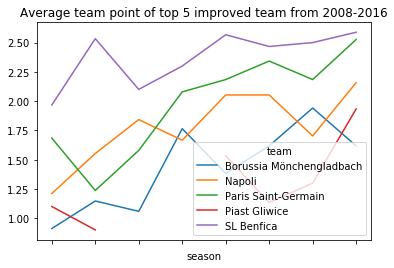

In [21]:
top5_crosstab = top_5_imp_team.pivot(index='season', columns='team',
                                     values='avg_points_per_match_per_season')
top5_crosstab.plot(title = "Average team point of top 5 improved team from 2008-2016")

The line chart shows the average team point trend for the top improved team from 2006 to 2016. We can see that in general SL Benfica's performance is the best And we can see paris sanit germain made the best improvement. However,there are some missing info for Pianst Gliwice. And there are some limitation here. we measured the improvement by taking the difference of average points per match of the season 2015/2016 and of the season 2008/2009,but ignore the value in the middle. 

### Question 2  What team attribute is the most important to team performance

We measure the team performance by the average point per match from season 2005/2006-2015/2016. And we contribute the top 10% performance teams'attribute with the rest of the team. We can see from the threshold of top 10% teams' point is 1.75 
Therefore, we divided the dataset to two dataset. average points per match>1.75 and average teams' point <1.75

In [22]:
# team_performance rank
score_board = team_performance.groupby(["team_id","team"]).agg({"avg_points_per_match_per_season": "mean"}).sort_values(by = "avg_points_per_match_per_season",ascending = False).reset_index()
score_board.rename(columns={"avg_points_per_match_per_season": "avg_team_point"},inplace = True)
0.1*len(score_board)
score_board.head(31)

,team_id,team,avg_team_point
0,8634,FC Barcelona,2.450658
1,9773,FC Porto,2.386520
2,9772,SL Benfica,2.377696
3,8633,Real Madrid CF,2.368421
4,9925,Celtic,2.315789
5,8548,Rangers,2.296053
6,9823,FC Bayern Munich,2.290441
7,8593,Ajax,2.213235
8,8635,RSC Anderlecht,2.156523
9,8640,PSV,2.136029


In [23]:
#merge the table with team attribute table 
match_team_attr = team_attr.merge(score_board,
                                  left_on = "team_api_id",
                                  right_on = "team_id",
                                  how = "inner")
match_team_attr.drop(columns = ["team_fifa_api_id","team_id","id","team_api_id"],
                     inplace = True)

#create dataset for top 10% team and the rest of the team
top_10_team = match_team_attr[match_team_attr["avg_team_point"] > 1.75]
rest_team =   match_team_attr[match_team_attr["avg_team_point"] <= 1.75]

In [24]:
top_10_team_attr = top_10_team.mean()

In [25]:
rest_team_attr = rest_team.mean()

In [26]:
top_10_attr = top_10_team_attr[:-1]
top_10_attr

buildUpPlaySpeed          52.762626
buildUpPlayPassing        43.868687
chanceCreationPassing     54.727273
chanceCreationCrossing    54.712121
chanceCreationShooting    56.909091
defencePressure           50.484848
defenceAggression         51.232323
defenceTeamWidth          52.853535
dtype: float64

In [27]:
rest_attr = rest_team_attr[:-1]

In [28]:
categories = list(top_10_attr.index)
categories = [*categories, categories[0]]

top_10_value = list(top_10_attr.values)
top_10_value = [*top_10_attr,top_10_attr[0]]

rest_value = list(rest_attr.values)
rest_value = [*rest_attr,rest_attr[0]]

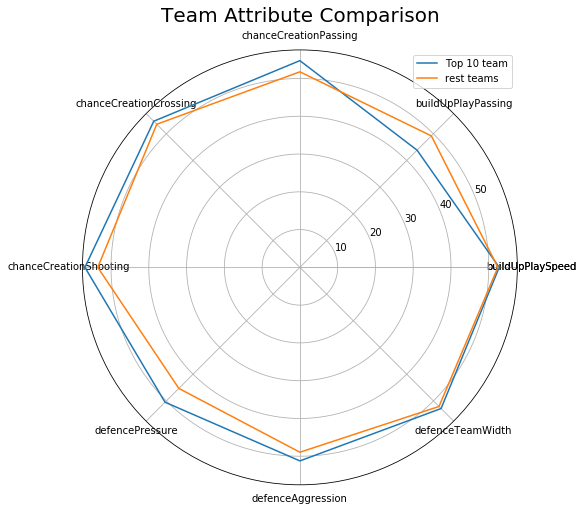

In [29]:
# draw radar chart 
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(rest_value))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc,top_10_value , label='Top 10 team')
plt.plot(label_loc, rest_value, label='rest teams')
plt.title('Team Attribute Comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

from the radar diagram, we can see the defencePressure,chance creation shooting and chance creation passing are top determined factors. Top 10% performance teams have high defence pressure and chance creations shooting and chance creation passing. However, Top 10% performance teams have lower build up play passing. 

# Question 3  Does football has home advantage? To what extent it affect the result?

In [30]:
# create columns of the match result (home_win or away win)
df_home_away.loc[df_home_away["home_points"]==3,"result"] = "home_win"
df_home_away.loc[df_home_away["home_points"]==1,"result"] ="draw"
df_home_away.loc[df_home_away["home_points"]==0,"result"] = "away_win"

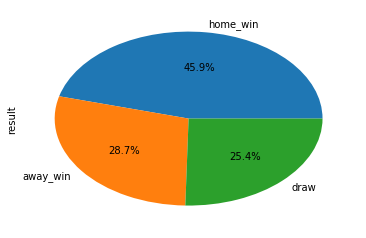

In [31]:
df_home_away["result"].value_counts().plot(kind= "pie",autopct='%1.1f%%')
plt.figure(figsize=(8, 8))

We can sees from the pie charat above, the chance of home team won the match is much higher than the away team. 

In [32]:
df_match_coun = df_home_away[["country","result"]]

In [33]:
df_country_result  = df_match_coun.groupby(["country","result"])["result"].count()

In [34]:
df_country_result_proc = df_country_result.unstack(level=1)

In [35]:
home_adv = df_country_result_proc.reset_index()
home_adv

result,country,away_win,draw,home_win
0,Belgium,493,425,810
1,England,867,783,1390
2,France,822,859,1359
3,Germany,744,597,1107
4,Italy,814,796,1407
5,Netherlands,696,581,1171
6,Poland,525,525,870
7,Portugal,611,533,908
8,Scotland,617,447,760
9,Spain,851,704,1485


Text(0.5,1,'The match results per country')

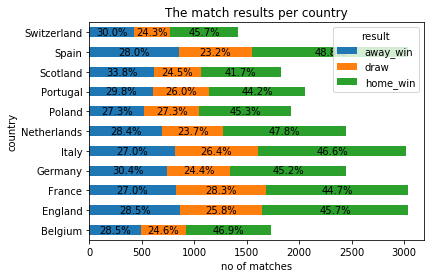

In [46]:
home_adv.plot(x= "country",kind = "barh",stacked = True,mark_right = True)
df_total = home_adv["away_win"] + home_adv["draw"]+ home_adv["home_win"]
df_rel = home_adv[home_adv.columns[1:]].div(df_total,0)*100

for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(home_adv.iloc[:, 1:].cumsum(1)[n], 
                                         home_adv[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
plt.xlabel('no of matches',fontsize=10)  
plt.title('The match results per country')

We can see that there is no significant difference of home advantage in different countries that the match held. in general home team has higher chance of winning(45%) while away team has around 28%-30% of wining. 

<a id='conclusions'></a>
## Conclusions

This project evaluated the team improved the most over the whole period(2008/2009 - 2015/2016). The improvement is measured by the difference between average point per match in 2015/2016 and 2008/2009.We can see that team Napoli made the biggest improvement. The team point increased by 0.94. From the average match points for top 5 improved team we can see that Benfica gave a more stable performance. 
The data has some limitation that we don't have all record during the whole period for each team. and we ignored the value in the middle for the period. 

For home advantage, we can see that there are some degrees of home advantage. home team won 46% of the total matches. However the home advantage doesn't differ for the country the match was held in. 

We also compared the team attributes between the top 10% performed  teams and the rest of the team. We can see that they have the similar number for build up play speed. for build up playing pass, top 10% performed team even have lower value. These two attribute might not be the most important attribute for the teams' success. 

In teams of deference pressure and chance creation shooting. We can clearly see the top 10% teams have higher value. These two could be the most important attributes for team's success. 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])